# The Indian buffet process

Here we look at the data generating process of *Indian buffet process* distributed binary matrices. See [Griffiths and Ghahramani (2011)](http://www.jmlr.org/papers/v12/griffiths11a.html) for details.

In the IBP $n$ customers enter a restaurant. The first one takes $\text{Pois}(\lambda)$ many dishes. The $i$th customers takes the same dishes as the customers before, each with probability $\frac{n_k}{i}$, where $n_k$ is the number of customers who took dish $k$. After that the $i$th customer chooses $\text{Pois}(\frac{\lambda}{i})$ new customers.


TODO: add data and do a latent feature analysos

In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(reshape))
options(repr.plot.height = 3, repr.plot.width = 8)

Warning message:
“package ‘dplyr’ was built under R version 3.5.1”

Below we fix the number of customers, and the hyperparameters.

In [2]:
n <- 10
lambda <- 10

$n_k$ is the number of customers for dish $k$, $K$ is the current number of different dishes, $\mathbf{Z}$ is a $(n \times K)$ matrix where every element $z_{ij}$ describes if customer $i$ took dish $k$.

In [3]:
nk <- c()
K <- 0
Z <- matrix(0, n, 0)

Then we generate the dishes using the IBP.

In [4]:
for (i in seq(n))
{
   for (k in seq_len(K))
   {
        prob <- nk[k] / i
        z <- rbinom(1, 1, prob = prob)
        Z[i, k] <- z
        nk[k] <- nk[k] + 1
   }
   
    n.new <- rpois(1, lambda / i)
    z <- matrix(0, n, n.new)
    z[i, ] <- 1
    Z <- cbind(Z, z)
    
    nk <- c(nk, rep(1, n.new))
    K <- K + n.new
}

Finally let's plot the binary matrix as tile plot.

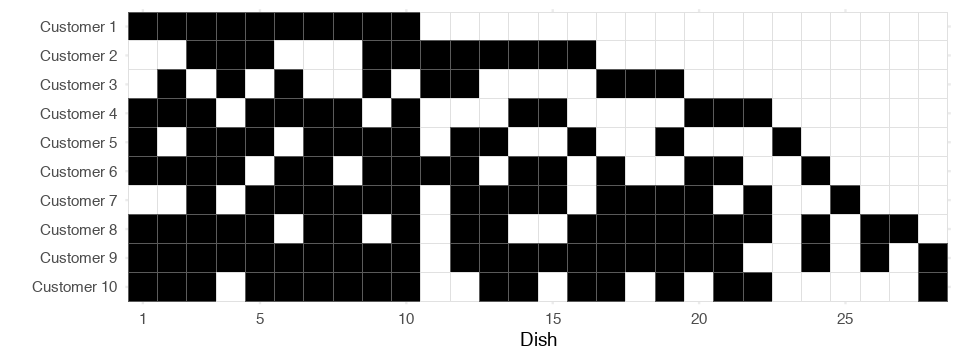

In [5]:
reshape::melt(Z) %>%
    ggplot() +
    geom_tile(aes(x = as.factor(X2), y = as.factor(X1), fill = as.factor(value)), color="grey") +
    scale_fill_manual(values = c("white", "black")) +
    scale_x_discrete("Dish", breaks=c(1, 5, 10, 15, 20, 25)) + 
    scale_y_discrete("", breaks=seq(10, 1), limits=seq(10, 1), labels=paste("Customer", seq(1, 10))) + 
    theme_minimal() +
    theme(legend.position = "none")